### 비용함수와 경사하강법에 대한 설명을 위한 차트 - 보기만 하세요

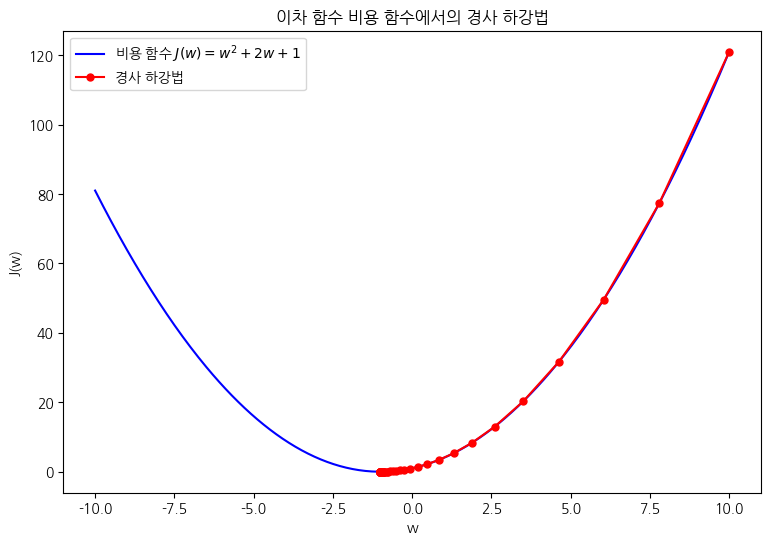

최종 w 값: -0.9998430027538023
최종 비용 함수 값: 2.464813531055654e-08


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 비용 함수 J(w)와 기울기 계산 함수
def cost_function(w):
    return w**2 + 2*w + 1

def gradient(w):
    return 2*w + 2

# 경사 하강법 함수
def gradient_descent(w_init, learning_rate, iterations):
    w = w_init
    w_history = [w]
    cost_history = [cost_function(w)]
    
    for i in range(iterations):
        w = w - learning_rate * gradient(w)
        w_history.append(w)
        cost_history.append(cost_function(w))
    
    return w, w_history, cost_history

# 초기 파라미터 설정
initial_w = 10
learning_rate = 0.1
iterations = 50

# 경사 하강법 실행
final_w, w_history, cost_history = gradient_descent(initial_w, learning_rate, iterations)

# 비용 함수의 형태와 경사 하강법 과정 시각화
w_values = np.linspace(-10, 10, 400)
cost_values = cost_function(w_values)

plt.figure(figsize=(9, 6))
plt.plot(w_values, cost_values, 'b-', label='비용 함수 $J(w) = w^2 + 2w + 1$')
plt.plot(w_history, cost_history, 'ro-', markersize=5, label='경사 하강법')
plt.xlabel('w')
plt.ylabel('J(w)')
plt.title('이차 함수 비용 함수에서의 경사 하강법')
plt.legend()
plt.show()

# 최종 결과 출력
print("최종 w 값:", final_w)
print("최종 비용 함수 값:", cost_history[-1])

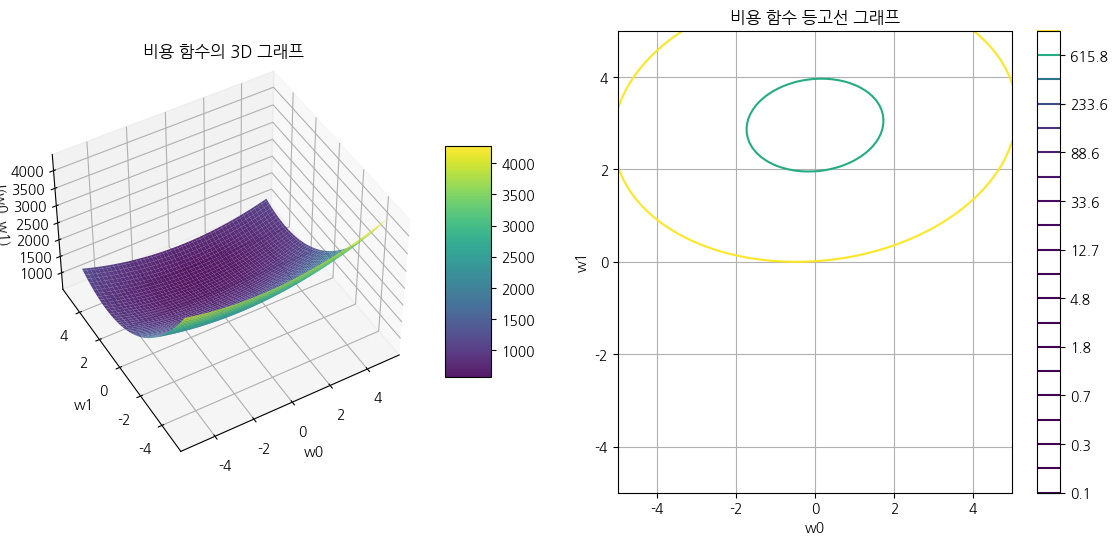

초기 파라미터 값: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
초기 비용 함수 값: 10.031308475765423


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1) - 1  # -1에서 1 사이의 값으로 변경
y = 1 + 2 * X + 3 * X**2 + 4 * X**3 + 5 * X**4 + np.random.randn(100, 1)  # 더 높은 차수의 다항식

# 다항 회귀를 위한 X 확장
X_poly = np.c_[np.ones((100, 1)), X, X**2, X**3, X**4]

# 비용 함수 J(w) 계산
def cost_function(w, X, y):
    m = len(y)
    predictions = X.dot(w)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# 비용 함수의 형태를 등고선 형태와 3D 형태로 시각화
w0_vals = np.linspace(-5, 5, 100)
w1_vals = np.linspace(-5, 5, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w_sample = np.array([w0_vals[i], w1_vals[j], 0, 0, 0])  # w2, w3, w4는 0으로 고정
        J_vals[i, j] = cost_function(w_sample, X_poly, y)

w0_vals, w1_vals = np.meshgrid(w0_vals, w1_vals)

# 3D 그래프
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(w0_vals, w1_vals, J_vals, cmap='viridis', edgecolor='none', alpha=0.9)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('J(w0, w1)')
ax.set_title('비용 함수의 3D 그래프')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.view_init(45, 240)  # 뷰 각도 설정

# 등고선 그래프
ax2 = fig.add_subplot(122)
cp = ax2.contour(w0_vals, w1_vals, J_vals, levels=np.logspace(-1, 3, 20))
ax2.set_xlabel('w0')
ax2.set_ylabel('w1')
ax2.set_title('비용 함수 등고선 그래프')
fig.colorbar(cp, ax=ax2)
plt.grid(True)
plt.show()

# 최종 결과 출력
initial_w = np.zeros((5, 1))
print("초기 파라미터 값:", initial_w)
print("초기 비용 함수 값:", cost_function(initial_w, X_poly, y))


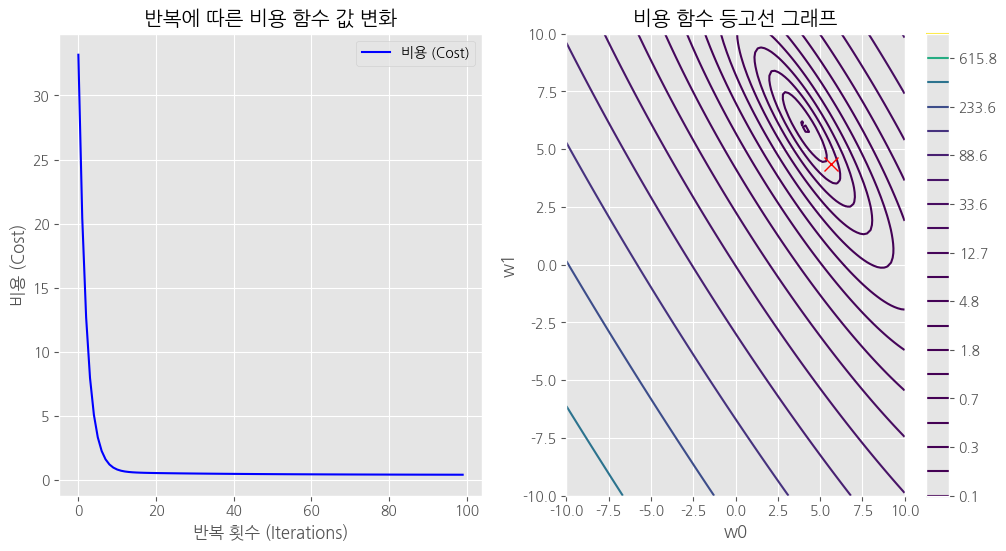

최종 w0 값: 5.619176237705586
최종 w1 값: 4.377253965650949
최종 비용 함수 값: 0.4301993008771759


In [3]:
plt.style.use('ggplot')  # 'ggplot' 테마 설정

# 데이터 생성
np.random.seed(11)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

# 비용 함수 J(w0, w1) 계산
def cost_function(w0, w1, X, y):
    m = len(y)
    predictions = w0 + w1 * X
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# 비용 함수의 기울기 계산
def gradients(w0, w1, X, y):
    m = len(y)
    predictions = w0 + w1 * X
    w0_grad = (1 / m) * np.sum(predictions - y)
    w1_grad = (1 / m) * np.sum((predictions - y) * X)
    return w0_grad, w1_grad

# 경사 하강법 함수
def gradient_descent(X, y, w0, w1, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        w0_grad, w1_grad = gradients(w0, w1, X, y)
        w0 = w0 - learning_rate * w0_grad
        w1 = w1 - learning_rate * w1_grad
        cost = cost_function(w0, w1, X, y)
        cost_history.append(cost)
    return w0, w1, cost_history

# 초기 파라미터 설정
initial_w0 = 0
initial_w1 = 0
learning_rate = 0.1
iterations = 100

# 경사 하강법 실행
w0, w1, cost_history = gradient_descent(X, y, initial_w0, initial_w1, learning_rate, iterations)

# 비용 함수 변화 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(range(iterations), cost_history, 'b-', label='비용 (Cost)')
plt.xlabel('반복 횟수 (Iterations)')
plt.ylabel('비용 (Cost)')
plt.title('반복에 따른 비용 함수 값 변화')
plt.legend()

# 비용 함수의 형태를 등고선 형태로 시각화
w0_vals = np.linspace(-10, 10, 100)
w1_vals = np.linspace(-10, 10, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        J_vals[i, j] = cost_function(w0_vals[i], w1_vals[j], X, y)

w0_vals, w1_vals = np.meshgrid(w0_vals, w1_vals)

plt.subplot(1,2,2)
cp = plt.contour(w0_vals, w1_vals, J_vals, levels=np.logspace(-1, 3, 20))
plt.plot(w0, w1, 'rx', markersize=10, linewidth=2)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('비용 함수 등고선 그래프')
plt.colorbar(cp)
plt.show()

# 최종 결과 출력
print("최종 w0 값:", w0)
print("최종 w1 값:", w1)
print("최종 비용 함수 값:", cost_history[-1])

### 선형회귀와 다항회귀의 비교

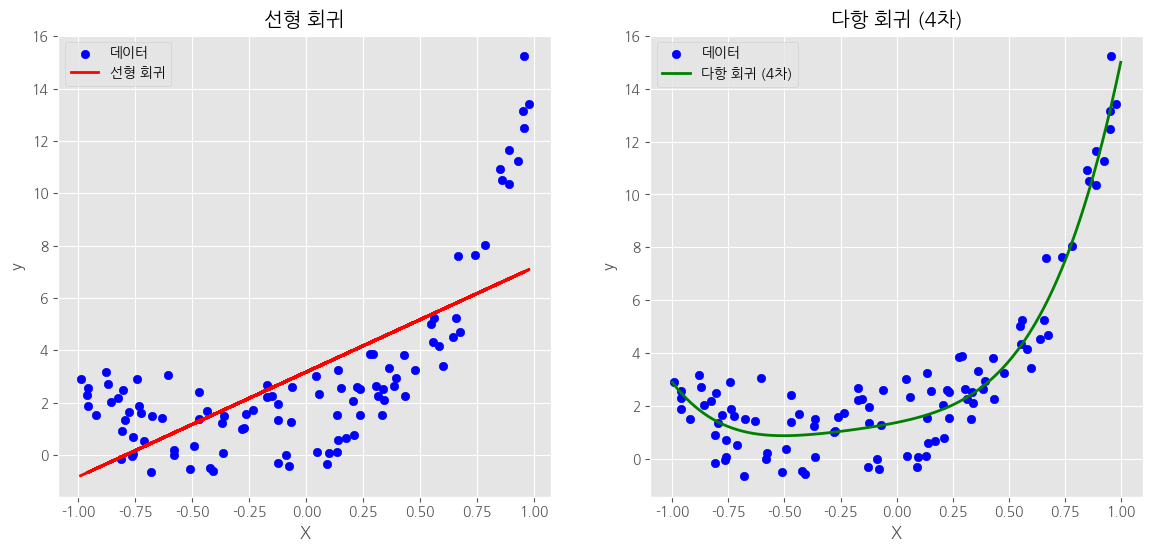

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1) - 1  # -1에서 1 사이의 값으로 변경
y = 1 + 2 * X + 3 * X**2 + 4 * X**3 + 5 * X**4 + np.random.randn(100, 1)  # 4차 다항식 데이터

# 선형 회귀 모델
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# 다항 회귀 모델 (4차)
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

# 데이터 정렬
X_new = np.linspace(-1, 1, 100).reshape(100, 1)
X_poly_new = poly_features.transform(X_new)
y_poly_new = poly_reg.predict(X_poly_new)

# 데이터 및 회귀 결과 시각화
plt.figure(figsize=(14, 6))

# 선형 회귀 그래프
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='데이터')
plt.plot(X, y_pred_lin, color='red', linewidth=2, label='선형 회귀')
plt.xlabel('X')
plt.ylabel('y')
plt.title('선형 회귀')
plt.legend()
plt.grid(True)

# 다항 회귀 그래프
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='데이터')
plt.plot(X_new, y_poly_new, color='green', linewidth=2, label='다항 회귀 (4차)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('다항 회귀 (4차)')
plt.legend()
plt.grid(True)

plt.show()

### 1. Gradient Descent 경사하강법
**실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성**

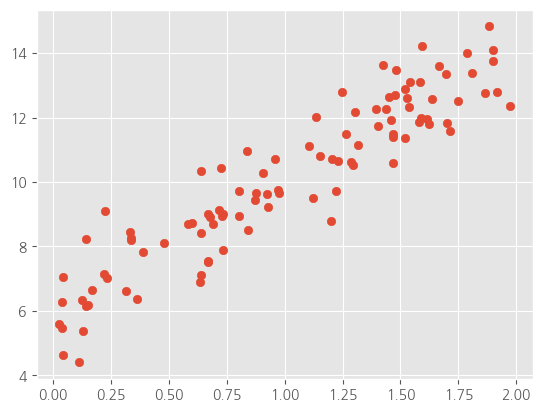

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 재현성을 위해 랜덤 시드를 설정
np.random.seed(11)

# X와 y 데이터를 y = 4X + 6 방정식에 근사하도록 생성하고, 노이즈를 추가
# X는 0과 2 사이의 랜덤 값으로 이루어진 100x1 배열
X = 2 * np.random.rand(100, 1)
# y는 방정식 y = 6 + 4 * X + 노이즈를 사용하여 계산, 여기서 노이즈는 표준 정규 분포에서 랜덤 값
y = 6 + 4 * X + np.random.randn(100, 1)

# X와 y 데이터 셋을 산점도로 시각화
plt.scatter(X, y)

In [6]:
X.shape, y.shape

((100, 1), (100, 1))

**w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성**

* 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임
100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)*w1 + X(2)*w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적임.
* 새로운 w1과 w0를 update함
![](./image01.png)

In [7]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환하는 함수
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)  # y의 길이, 즉 데이터 샘플의 수
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열을 계산하고 예측 값과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [8]:
# w0와 w1을 각각 1x1 크기의 0으로 초기화된 배열로 설정
w0 = np.zeros((1, 1))
w1 = np.zeros((1, 1))

# 예측 값 y_pred를 계산. y_pred = X * w1의 전치 + w0
y_pred = np.dot(X, w1.T) + w0

# 실제 값 y와 예측 값 y_pred의 차이(diff)를 계산
diff = y - y_pred

# diff의 shape을 출력하여 확인
print(diff.shape)

# w0_update를 계산하기 위해 모두 1 값을 가진 100x1 크기의 행렬을 생성
w0_factors = np.ones((100, 1))

# w1을 업데이트할 값 w1_update를 계산
# -(2/N) * 학습률 * (X의 전치와 diff의 dot product)
w1_update = -(2 / 100) * 0.01 * (np.dot(X.T, diff))

# w0을 업데이트할 값 w0_update를 계산
# -(2/N) * 학습률 * (w0_factors의 전치와 diff의 dot product)
w0_update = -(2 / 100) * 0.01 * (np.dot(w0_factors.T, diff))

# w1_update와 w0_update의 shape을 출력하여 확인
print(w1_update.shape, w0_update.shape)

# w1과 w0 값을 출력
w1, w0


(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

**반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성**

In [9]:
# 입력 인자인 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용하는 함수
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    # 인자로 주어진 iters 횟수만큼 반복
    for ind in range(iters):
        # 현재 w1과 w0를 사용하여 업데이트할 w1_update와 w0_update 계산
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        # 계산된 업데이트 값을 사용하여 w1과 w0를 업데이트
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    # 최종 업데이트된 w1과 w0 값을 반환
    return w1, w0


**예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행**

In [10]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.160 w0:5.877
Gradient Descent Total Cost:0.8337


**미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출**

In [11]:
# 확률적 경사 하강법(Stochastic Gradient Descent)을 사용하여 w1과 w0를 업데이트하는 함수
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    # 이전 비용 값을 초기화 (비교를 위해 큰 값으로 설정)
    prev_cost = 100000
    # 반복 횟수 인덱스 초기화
    iter_index = 0
    
    # 인자로 주어진 iters 횟수만큼 반복
    for ind in range(iters):
        # 매 반복마다 다른 난수를 생성하기 위해 시드 설정
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    # 최종 업데이트된 w1과 w0 값을 반환
    return w1, w0


In [12]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.119 w0: 5.928
Stochastic Gradient Descent Total Cost:0.8323
